## This project is from  Laurence Moroney's Convolutional Neural Networks Coursera exercise
### Goal: Train a CNN model to achieve .999 accuracy to distinguish happy and sad images

In [1]:
# import data and define callback

import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log={}):
    if (log.get('acc') >= DESIRED_ACCURACY):
      print('Goal achieved, model has attained 99.9% accuracy!')
      self.model.stop_training = True
      
  

callbacks = myCallback()

--2019-06-30 20:20:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.24.144, 2404:6800:4004:806::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.24.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-06-30 20:20:33 (182 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
# define and compile CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0630 20:20:35.223742 139628374419328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0630 20:20:35.453494 139628374419328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_dir = os.path.join('/tmp/h-or-s/sad')
train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-07.png', 'happy1-01.png', 'happy2-16.png', 'happy1-12.png', 'happy2-03.png', 'happy2-07.png', 'happy1-10.png', 'happy1-16.png', 'happy1-19.png', 'happy1-09.png']
['sad2-06.png', 'sad2-14.png', 'sad2-16.png', 'sad2-08.png', 'sad1-01.png', 'sad2-03.png', 'sad1-12.png', 'sad1-06.png', 'sad2-00.png', 'sad1-07.png']


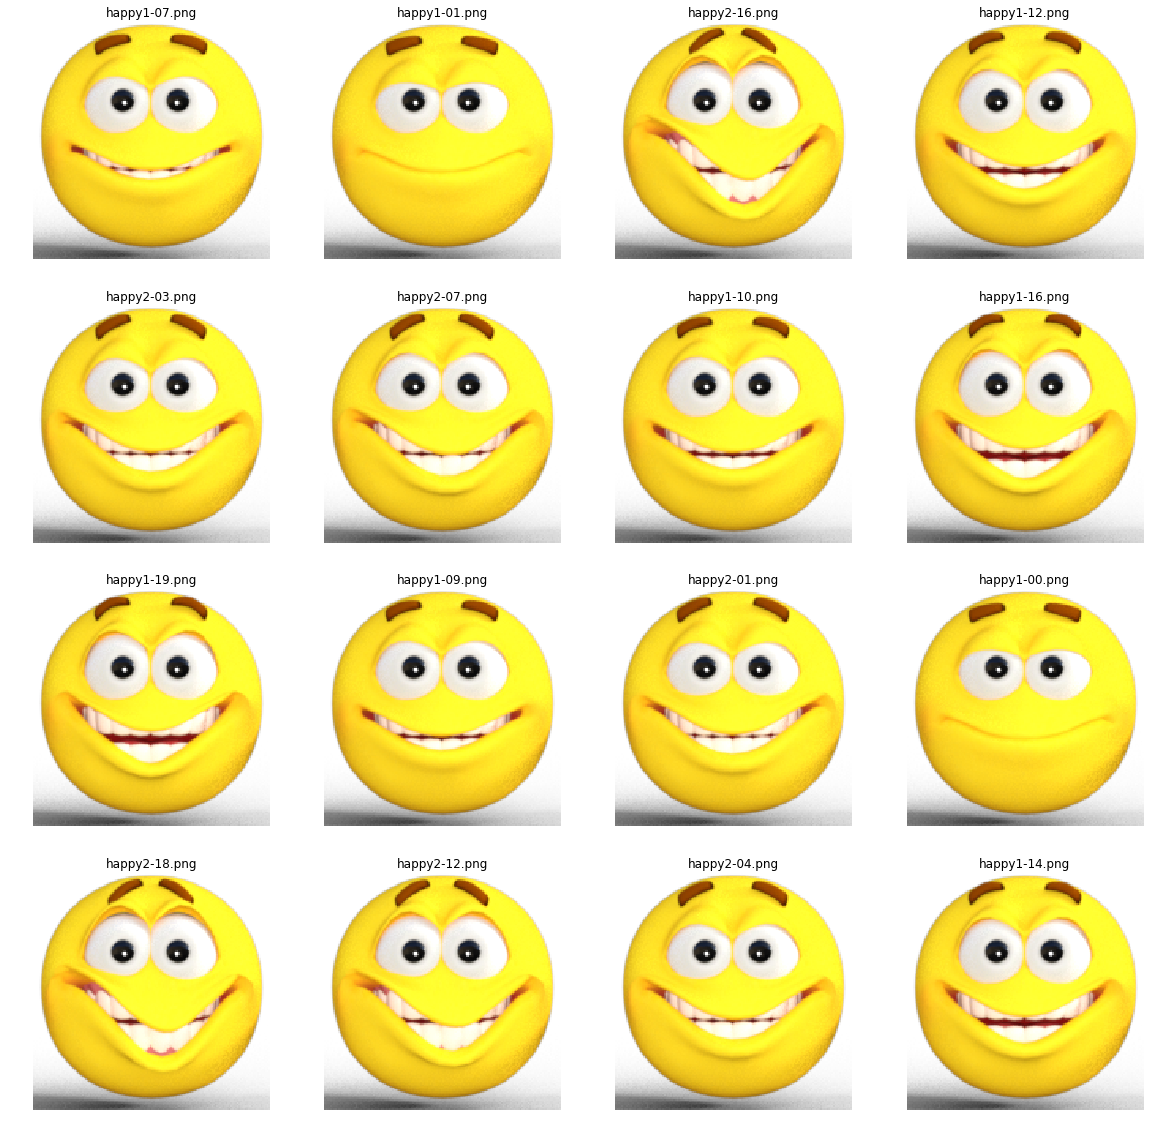

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 16

# indexing the happy faces
check_happy_pix = [os.path.join(train_happy_dir, fname) for fname in train_happy_names[pic_index-16:pic_index]]
check_happy_filenames = [fname for fname in train_happy_names[pic_index-16:pic_index]]

# indexing the sad faces
check_sad_pix = [os.path.join(train_sad_dir, fname) for fname in train_sad_names[pic_index-16:pic_index]]
check_sad_filenames = [fname for fname in train_sad_names[pic_index-16:pic_index]]

# print the first 16 happy faces for data sanity check 
for i, img_path in enumerate(check_happy_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(check_happy_filenames[i])

plt.show()

# original data looks OK, happy faces look happy!



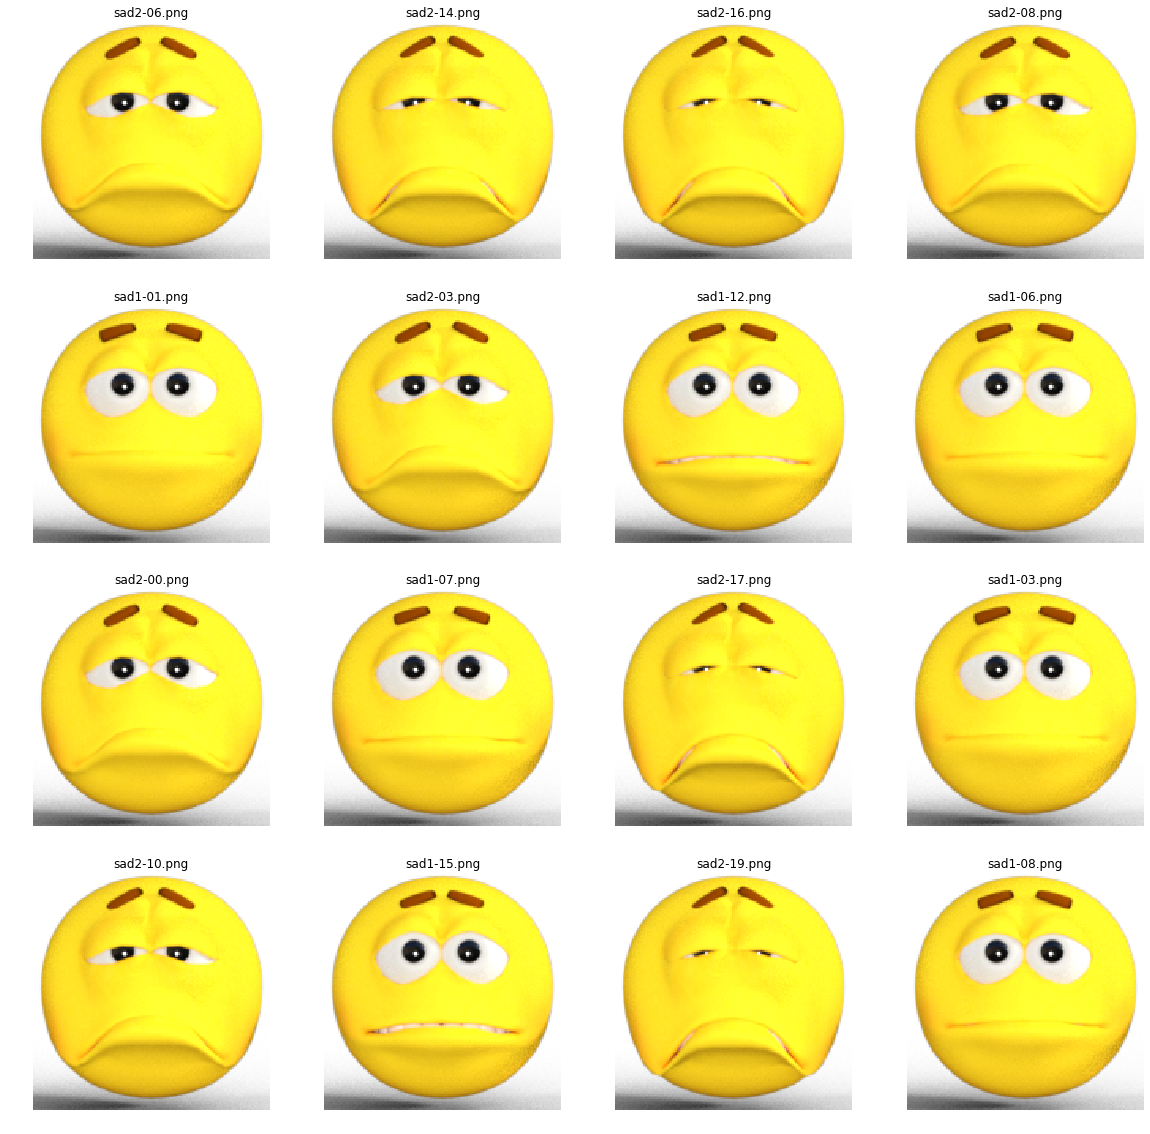

In [45]:
# print the first 16 sad faces for data sanity check

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

for i, img_path in enumerate(check_sad_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(check_sad_filenames[i])

plt.show()

# sad faces look sad!

In [4]:
# set ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',  
        target_size=(150, 150),  
        batch_size=5,
        class_mode='binary')



Found 80 images belonging to 2 classes.


In [0]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      callbacks=[callbacks]
      )

# goal of 99.9% accuracy has been achieved with 2 epochs

Epoch 1/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1282 - acc: 0.9250
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000


In [0]:
# test model with new images

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " the person in the image is sad")
  else:
    print(fn + " is a happy")



Saving how-to-be-happy.jpg to how-to-be-happy (2).jpg
[0.]
how-to-be-happy.jpg is a happy
